In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("../DATA/wine_fraud.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [10]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

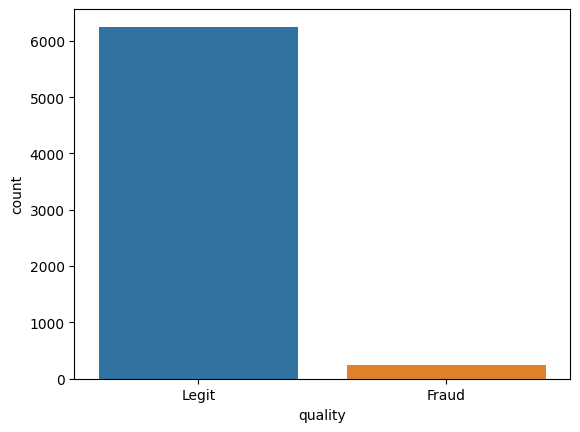

In [11]:
sns.countplot(x=df['quality'], hue='quality', data=df)

<Axes: xlabel='type', ylabel='count'>

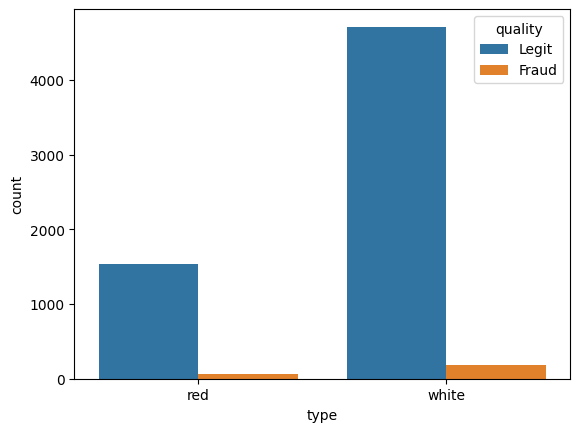

In [12]:
sns.countplot(x=df['type'], hue='quality', data=df)

In [13]:
red = df[df['type'] == 'red']
red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
 12  type                  1599 non-null   object 
dtypes: float64(11), object(2)
memory usage: 174.9+ KB


In [14]:
white = df[df['type'] == 'white']
# white.info()

In [15]:
len(red[red['quality'] == 'Fraud'])/len(red) * 100

3.9399624765478425

In [16]:
len(white[white['quality'] == 'Fraud'])/len(white) * 100

3.7362188648427925

In [17]:
df['Fraud'] = df['quality'].map({'Fraud': 1, 'Legit': 0})
# df.head()

In [18]:
df['Red'] = df['type'].map({'red': 1, 'white': 0})
# df.head()

In [19]:
numeric_df = df.drop(['quality', 'type'], axis=1)
# numeric_df.head()

In [20]:
numeric_df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Red                     0.004598
Name: Fraud, dtype: float64

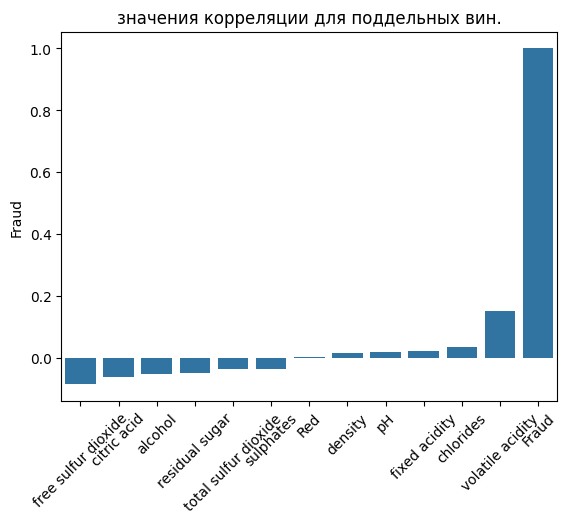

In [21]:
sns.barplot(data=numeric_df.corr()['Fraud'].sort_values())

plt.xticks(rotation=45)
plt.title('значения корреляции для поддельных вин.')
plt.show()

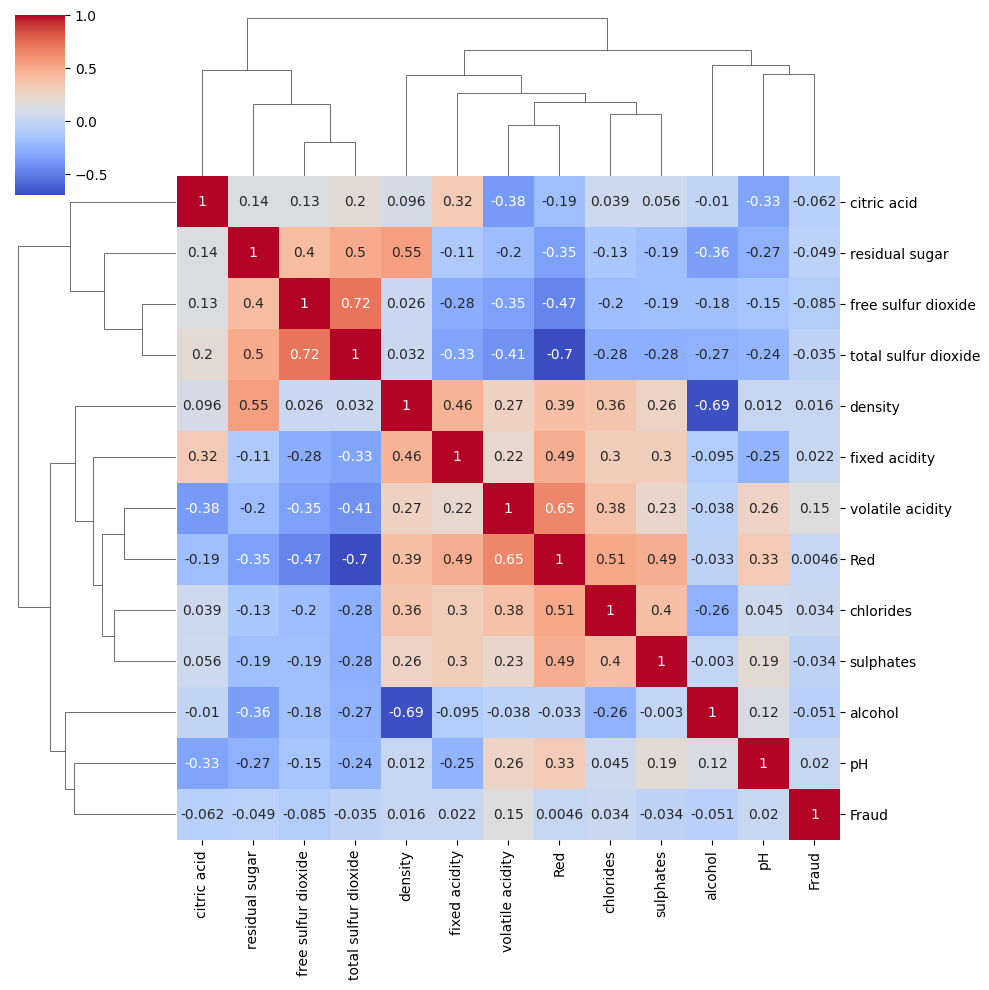

In [22]:
sns.clustermap(data = numeric_df.corr(), annot=True, cmap='coolwarm')

plt.xticks(rotation=45)
plt.show()

In [23]:
df['type'].unique()

array(['red', 'white'], dtype=object)

In [24]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [25]:
df['type'] = pd.get_dummies(df['type'],drop_first=True).astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   int64  
 13  Fraud                 6497 non-null   int64  
 14  Red                   6497 non-null   int64  
dtypes: float64(11), int64

In [26]:
df['quality'] = pd.get_dummies(df['quality'], drop_first=True).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
 13  Fraud                 6497 non-null   int64  
 14  Red                   6497 non-null   int64  
dtypes: float64(11), int64

In [27]:
df['quality'].value_counts()

quality
1    6251
0     246
Name: count, dtype: int64

In [28]:
df['type'].value_counts()

type
1    4898
0    1599
Name: count, dtype: int64

In [29]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'Fraud', 'Red'],
      dtype='object')

In [30]:
df = df.drop(['Fraud', 'Red'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [31]:
X = df.drop('quality', axis=1)
y = df['quality']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [34]:
print(y_test.value_counts())

quality
1    625
0     25
Name: count, dtype: int64


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight

In [36]:
scaler = StandardScaler()
svm = SVC()

In [37]:
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

In [38]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(class_weight=class_weights, probability=True))
])

In [39]:
param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 0.5, 1],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['linear', 'rbf']
}

In [40]:
model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

In [41]:
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(class_weight={np.int64(0): np.float64(13.228506787330316),
                                                          np.int64(1): np.float64(0.5196409527195165)},
                                            probability=True))]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [42]:
model.best_params_

{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}

In [43]:
y_predicted = model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,\
        classification_report, precision_score, recall_score, roc_auc_score

In [45]:
confusion_matrix(y_test, y_predicted)

array([[ 19,   6],
       [ 96, 529]])

In [46]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.17      0.76      0.27        25
           1       0.99      0.85      0.91       625

    accuracy                           0.84       650
   macro avg       0.58      0.80      0.59       650
weighted avg       0.96      0.84      0.89       650



In [47]:
precision_score(y_test, y_predicted)

0.9887850467289719

In [48]:
recall_score(y_test, y_predicted)

0.8464

In [49]:
precision_0 = precision_score(y_test, y_predicted, pos_label=0)
recall_0 = recall_score(y_test, y_predicted, pos_label=0)
print("Precision for class 0:", precision_0)  # Ожидается ~0.17
print("Recall for class 0:", recall_0)        # Ожидается 0.76

Precision for class 0: 0.16521739130434782
Recall for class 0: 0.76


In [50]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

ROC-AUC: 0.8746240000000002
